In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
font = {
        'size'   : 22}
mpl.rc('font', **font)

mpl.rcParams['lines.markersize'] = 1

In [15]:
dfmasc = pd.read_csv("./bases/suicide/suicidioMasculino.csv")

In [3]:
dfreg = pd.read_csv("./bases/wdi/Country.csv")

In [4]:
df = pd.read_csv("./bases/education/EdStatsAjustado.csv")

In [12]:
dfregmerge = dfreg[['CountryCode','Region','IncomeGroup']].copy()
dfregmerge.rename(columns={'CountryCode':'countrycode','Region':'region','IncomeGroup':'incomegroup'},inplace=True)

In [13]:
dfx = df[df.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
dfx = dfx[["CountryCode","Year","Value"]].reset_index(drop=True)
dfx.rename(columns={'CountryCode':'countrycode','Year':'year','Value':'value'},inplace=True)

In [16]:
dfmasc = dfmasc.join(dfx.set_index(['countrycode','year']), on=['countrycode','year'])

In [22]:
dfmasc.rename(columns={'value':'gdp'}, inplace=True)

In [25]:
df2 = pd.merge(dfmasc, dfregmerge, on='countrycode')
df2.region.unique()
#df2 = df2.replace({'East Asia & Pacific':0,'Europe & Central Asia':1,
#       'Latin America & Caribbean':2, 'Middle East & North Africa':3,
#       'North America':4, 'Sub-Saharan Africa':5})
regioes = ['Europe & Central Asia', 'Latin America & Caribbean',
       'East Asia & Pacific', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'North America', 'South Asia']
df2['idregion'] = df2['region'].apply(lambda x: regioes.index(x) )
df2['idregion'] = pd.to_numeric(df2['idregion'])

Text(0, 0.5, 'Suicídio homens 25-34 anos')

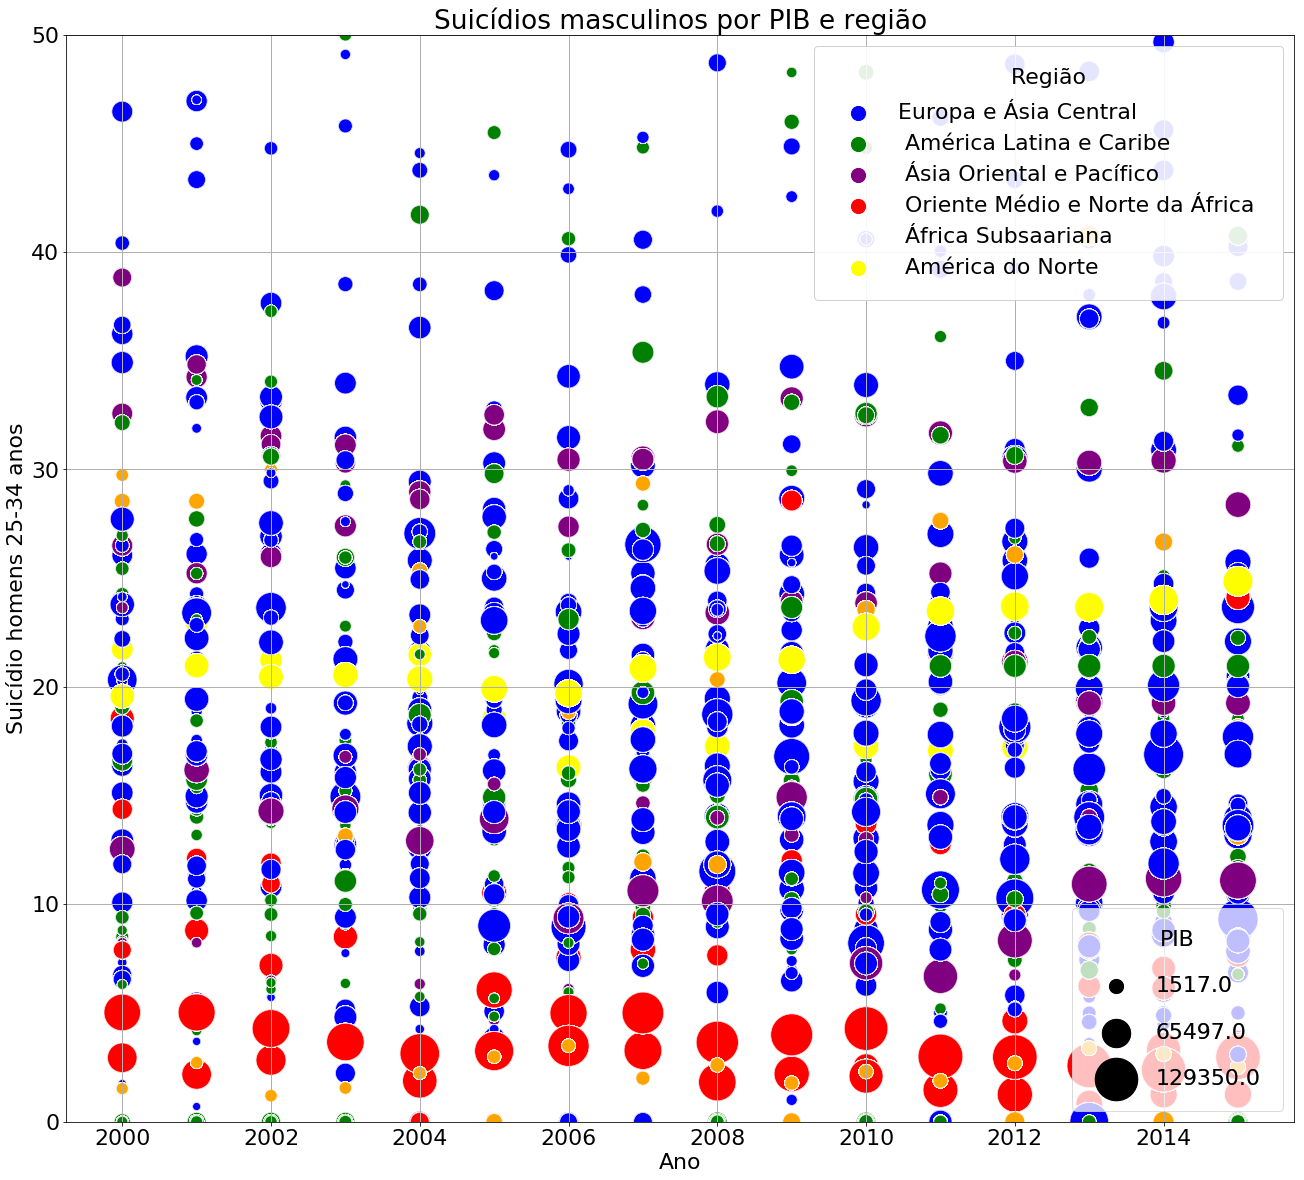

In [57]:
fig, ax = plt.subplots(figsize=(22, 20))
# add stripplot to boxplot with Seaborn
cmap = ListedColormap(['blue', 'green', 'purple','red','orange','yellow'])
bplot=sns.scatterplot(y='suicidio2534', x='year', size='gdp', hue='idregion',
                   data=df2, 
                   alpha=0.8, palette=cmap, sizes=(50,2000))
ax.grid(b=True, which='major', linewidth=1)
legend = bplot.legend_
ax.set_ylim(0,50)
ax.set_title("Suicídios masculinos por PIB e região")
#regiao = ['East Asia & Pacific','Europe & Central Asia',
#       'Latin America & Caribbean', 'Middle East & North Africa',
#       'North America', 'Sub-Saharan Africa']

legend.get_texts()[0].set_text('Região')

h, l = plt.gca().get_legend_handles_labels()
pws = (pd.cut(df2['gdp'], bins=2, retbins=True)[1]).round(0)



print()
#for pw in pws:
#    plt.scatter([], [], s=(pw), c="k",label=str(pw))

#
l = ['title','Europa e Ásia Central ',' América Latina e Caribe ',' Ásia Oriental e Pacífico ',' Oriente Médio e Norte da África ',' África Subsaariana ',' América do Norte ',' Sul da Ásia '] + list(pws)

lgd = ax.legend(h[1:7], l[1:7], numpoints=1, loc=1, borderpad=1, 
            frameon=True, framealpha=0.9, title="Região")
cores = ['blue', 'green', 'purple','red','orange','yellow']
i=0
for handle in lgd.legendHandles:
    handle.set_sizes([200.0])
    handle.set_color(cores[i])
    i=i+1

lgd2 = ax.legend(h[7:], l[8:], labelspacing=1.2, title="PIB", borderpad=1, 
            frameon=True, framealpha=0.5, loc=4, numpoints=1)
i=1
for handle in lgd2.legendHandles:
    handle.set_sizes([(200)*(i**2)])
    handle.set_color('black')
    i=i+1
plt.gca().add_artist(lgd)
plt.gca().add_artist(lgd2)
ax.set_xlabel('Ano')
ax.set_ylabel('Suicídio homens 25-34 anos')


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
cmap = ListedColormap(['blue', 'green', 'blue','red','pink','yellow'])
test = df2.plot.scatter('gdp','suicidio2534',c='idregion', ax=ax, colormap=cmap) 

ax.set_xlim(0,100000)
ax.set_xlabel('PIB')
ax.set_ylabel('Suicídio homens 25-34 anos')
ax.set_title("Suicídios masculinos por PIB e região")

f = plt.gcf()
cax = f.get_axes()[1]
#and we can modify it, i.e.:
cax.set_ylabel('Região')